## 1. 선형회귀로 배우는 머신러닝 원리

<br>

"*데이터로부터 스스로 배운다* " 라는 말이 무슨 뜻일까요? 무엇을 배우고 어떻게 배울까요?

이번 시간에는 가장 쉬운 머신러닝 모델인 **선형회귀**를 통해 머신러닝이 데이터로부터 무엇을 어떻게 배우는지에 대해서 알아볼 것이에요.

먼저 제가 준비한 데이터가 어떻게 생겼는지 볼까요?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([-1.000,  -0.750,  -0.500,  -0.250,  0.000,  0.250,  0.500,  0.750,  1.000])
y = np.array([-1.639,  -0.755,  -0.578,   0.558,  1.877,  3.254,  4.049,  3.815,  5.211])

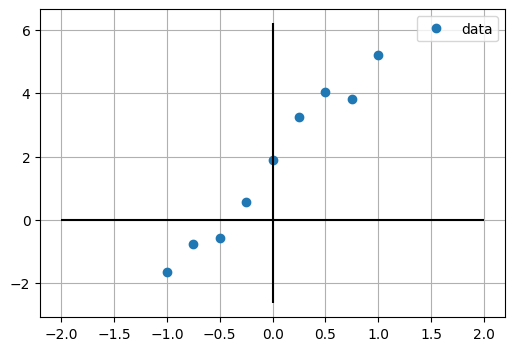

In [3]:
plt.figure(figsize = (6, 4))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

자, 데이터가 어떻게 생겼나요? 완벽하진 않아도 우상향하는 직선처럼 생겼죠?

우리는 일차함수를 사용해서 주어진 데이터들을 묘사해볼 것이에요.

<br>

일차함수는 어떻게 생겼죠?

$$f(x) = ax + b$$

여기서 $a$는 무엇인가요? $b$는 무엇인가요? $a$와 $b$의 값에 따라 일차함수의 모습이 달라지게 됩니다.

그럼 여러분들이 아래 코드에서 $a$와 $b$를 바꿔가며 데이터를 가장 잘 묘사하는 일차함수를 찾아주세요.

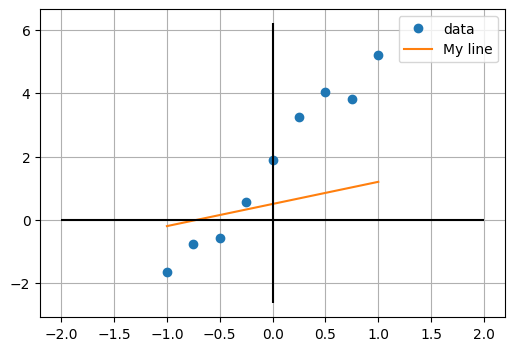

In [4]:
####################################
###    아래 a와 b를 바꿔주세요    ###
###################################
a = 0.7
b = 0.5
###################################
plt.figure(figsize = (6, 4))

# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# 직선 그리기
x1 = -1.0
x2 = 1.0
plt.plot([x1,x2], [a * x1 + b, a * x2 + b], '-', label='My line')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()


### 머신러닝은 무엇을 배울까?

<br>

위 예시를 통해 우리는 이제 머신러닝이 "**무엇**"을 배우는지 알게 되었어요.

우리가 사용할 모델이 데이터를 가장 잘 묘사할 수 있는 계수를 배우는 것이에요. 

<br>

예를 들어,
- 우리가 일차 함수 모델을 사용한다면, $f(x) = ax+b$의 계수는 $a$와 $b$ 입니다.
- 우리가 이차 함수 모델을 사용한다면, $f(x) = ax^2+bx+c$의 계수는 $a$, $b$, $c$ 입니다.
- 우리가 입력을 두 개 받는 선형 모델을 사용한다면, $f(x_1, x_2) = ax_1+bx_2+c$의 계수는 $a$, $b$, $c$ 입니다.

<br>

단, 머신러닝에서는 계수보다는 매개변수 (parameter)란 용어를 사용합니다.

요컨데, 머신러닝이 배우는 것은 모델의 모양을 결정해주는 매개변수 (parameter)입니다. 

그럼, 이 매개변수를 어떻게 결정해줄까요? 우리가 해줬던 것처럼 사람이 하나 하나 지정해줘야 할까요?

### 매개변수를 어떻게 결정할까?

<br>

일차 함수 모델만 보더라도 가능한 매개변수 $a, b$ 조합은 무수히 많습니다. 그럼, 어떤 매개변수가 좋은 매개변수이고 어떤 매개변수가 나쁜 매개변수일까요?

매개변수의 좋고 나쁨을 따지기 위해 우리는 손실 함수 (loss function)이라는 것을 정의합니다.

<br>


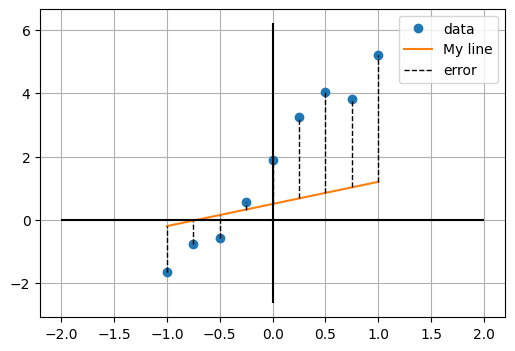

In [5]:
plt.figure(figsize = (6, 4))
plt.plot(x, y, 'o', label = 'data')
plt.plot([x1,x2], [a * x1 + b, a * x2 + b], '-', label='My line')
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')

for i in range(len(y)):
    ymin = min(a * x[i] + b, y[i])
    ymax = max(a * x[i] + b, y[i])
    plt.vlines(x=x[i], ymin=ymin, ymax=ymax, linestyle='dashed', linewidth=1, color='k', label='error' if i == 0 else "")
        
plt.grid()
plt.legend()
plt.show()

#### 손실 함수

우리에게 주어진 것은 9개의 데이터의 집합 $\left\{ (x_i, y_i) \right\}_{i=1}^{9}$ 이죠?

그리고 $a$와 $b$ 값이 정해지면 직선을 그릴 수 있고, 그 직선으로부터 각 $y_i$ 값까지의 거리의 절댓값을 오차라고 부릅니다.

손실함수는 모든 데이터에서 발생한 오차들의 제곱의 총합입니다.

$$
\begin{matrix}
    L(a, b) & = & \sum\limits_{i=1}^{9} \left( y_i - f(x_i)\right)^2 \\ 
            & = & \sum\limits_{i=1}^{9} \left( y_i - \left( ax_i + b \right) \right)^2 \\ 
\end{matrix}
$$

<br>

위의 식에서 $x_i$와 $y_i$는 데이터이기 때문에 미지수는 $a$와 $b$입니다. $a$와 $b$에 대한 이차식입니다!

<br>

#### 파라미터 최적화
우리는 모델이 실제 데이터와의 오차가 적길 바랍니다. 따라서 손실 함수를 최소로 만들어주는 $a$와 $b$를 최종 매개변수로 결정할 것입니다.

손실 함수의 최소값을 찾는 행위를 **파라미터 최적화**라고 부릅니다. 우리의 손실 함수의 경우 $a$와 $b$에 대한 이차식이기 때문에 미분해서 0되는 지점을 찾아주면 됩니다.

물론 미분은 다양한 패키지에서 알아서 해줍니다.

In [6]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x.reshape(-1,1),y.reshape(-1,1))

print("a: ", LR.coef_[0][0])
print("b: ", LR.intercept_[0])

a:  3.537333333333334
b:  1.7546666666666668


## 2. 비선형 모델

<br>

선형회귀 모델은 $x$와 $y$의 관계가 선형적이라고 가정한 모델입니다. 따라서 직선이나 평면 밖에 묘사하지 못합니다.

그럼 다음과 같이 곡선은 어떻게 묘사할 수 있을까요?

In [7]:
x = np.array([-2.000, -1.714, -1.429, -1.143, -0.857, -0.571, -0.286, 0.000, 0.286, 0.571, 0.857, 1.143, 1.429, 1.714, 2.000])
y = np.array([ 0.002,  0.008,  0.024,  0.071,  0.193,  0.429,  0.702, 0.881, 0.959, 0.986, 0.996, 0.999, 1.000, 1.000, 1.000])

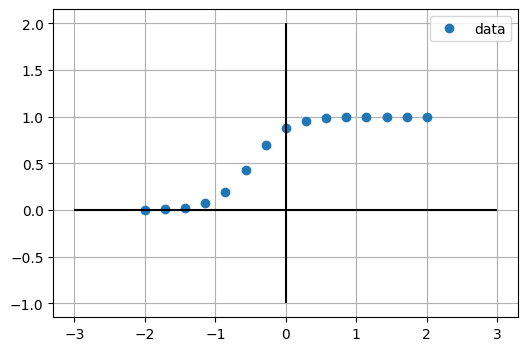

In [8]:
plt.figure(figsize = (6, 4))
# 데이터 그리기
plt.plot(x, y, 'o', label = 'data')

# x축 y축 그리기
plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

# 범례 보여주기
plt.legend()

# 보여주기
plt.show()

### 활성화 함수

사실 위 데이터는 다음과 같은 함수로 묘사할 수 있습니다.

$$f(x) = \frac{1}{1 + e^{-(ax+b)}}$$

위 함수 역시 $a$와 $b$에 따라서 모양이 변하게 됩니다. 

마찬가지로 $a$와 $b$를 바꿔가며 여러분들만의 최적의 $a$와 $b$를 찾아보세요.

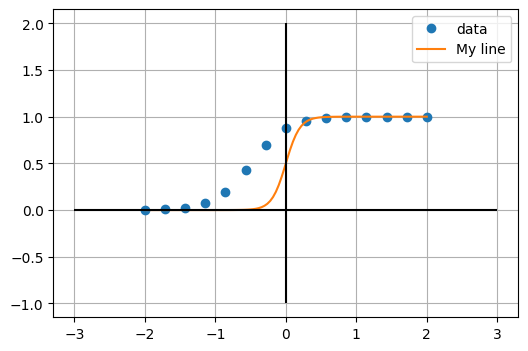

In [9]:
####################################
###    아래 a와 b를 바꿔주세요    ###
###################################
a = 10
b = 0
###################################
plt.figure(figsize = (6, 4))
plt.plot(x, y, 'o', label = 'data')

# 직선 그리기
xtest = np.linspace(-2.0, 2.0, 100)
ypred = 1 / (1 + np.exp(-(a * xtest + b)))
plt.plot(xtest, ypred, '-', label='My line')

plt.vlines(x = 0,  ymin = y.min()-1, ymax = y.max()+1, color='k')
plt.hlines(y = 0,  xmin = x.min()-1, xmax = x.max()+1, color='k')
plt.grid()

plt.legend()
plt.show()

$$f(x) = \frac{1}{1 + e^{-(ax+b)}}$$

위 식은 다음 2단계로 나눌 수 있습니다.

$$
\begin{matrix}
z & = & a x + b \\
f(x) & = & \sigma(z) \\
\text{where} & & \sigma(z)=\frac{1}{1+e^{-z}}
\end{matrix}
$$

먼저 선형 모델을 만든 후에 그 위에 $\sigma$ 함수를 씌운 것입니다. 

이렇게 선형 모델을 비선형으로 만들기 위해 취해주는 함수를 **활성화 함수**라고 부릅니다.

이후 최적의 매개변수 $a$와 $b$를 찾는 과정은 이전과 동일합니다. 즉, 모델만 달라지고 이후 손실 함수와 매개변수 최적화 과정은 동일합니다.

## 3. 딥러닝 모델

딥러닝 모델이 무엇인지 이 짧은 수업 시간에 설명하기는 어렵습니다.

지금 가장 쉽게 설명하기 위해서는 딥러닝은 합성 함수의 합성 함수의 합성 함수의 ... 를 모델로 사용하는 것입니다.

모델을 쉽게 표현하면 다음과 같습니다.

$$f(x) = \ldots a_4 \cdot \sigma \bigg(a_3 \cdot \sigma \Big( a_2 \cdot\sigma(a_1 x + b_1) + b_2 \Big) + b_3 \bigg) + b_4 + \ldots$$

모델을 이렇게 복잡하게 합성할수록 복잡한 형태의 함수를 만들어 낼 수 있습니다.

여기에서 파라미터는 꽤 많죠? $a_1, a_2, a_3, a_4, \ldots$, 그리고 $b_1, b_2, b_3, b_4, \ldots$ 엄청 많습니다.

물론 위의 딥러닝 모델도 쉬운 설명을 위해서 굉장히 단순화된 것이고 실제로는 파라미터가 백만개, 억개를 넘어섭니다.

하지만, 이후 손실 함수 정의 및 매개변수 최적화 과정은 동일합니다.